<a href="https://colab.research.google.com/github/Adarsh0027/BA01/blob/main/09_02_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data=files.upload()

Saving titanic.csv to titanic.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset=pd.read_csv("titanic.csv")
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
count=len(dataset)
print(count)
dataset.isnull().sum()

891


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
print('median of age column %2f'%(dataset['Age'].median(skipna=True)))
print('percent of missing records in the cabin column:%2f %%'%(dataset['Cabin'].isnull().sum()/len(dataset)*100))
print('common boarding most of embarkation:%s'%dataset['Embarked'].value_counts().idxmax())

median of age column 28.000000
percent of missing records in the cabin column:77.104377 %
common boarding most of embarkation:S


In [23]:
dataset['Age'].fillna(dataset['Age'].median(skipna=True),inplace=True)
dataset['Embarked'].fillna(dataset['Embarked'].value_counts().idxmax(),inplace=True)

In [25]:
dataset.drop("Cabin",axis=1,inplace=True)
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [35]:
dataset['Travel alone']=np.where((dataset['SibSp']+dataset['Parch'])>0,0,1)
dataset.drop('SibSp',axis=1,inplace=True)
dataset.drop('Parch',axis=1,inplace=True)

In [41]:
from google.colab import files
data=files.upload()

Saving titanic.csv to titanic (1).csv


In [42]:
dataset.drop('PassengerId',axis=1,inplace=True)
dataset.drop('Name',axis=1,inplace=True)
dataset.drop('Ticket',axis=1,inplace=True)

KeyError: ignored

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


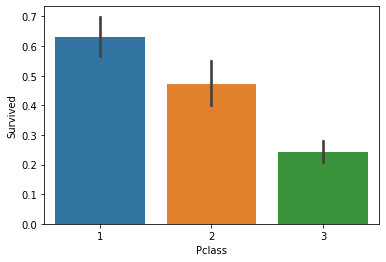

In [44]:
sns.barplot(x='Pclass',y='Survived',data=dataset)
dataset.groupby('Pclass',as_index=False).Survived.mean()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


3    491
1    216
2    184
Name: Pclass, dtype: int64

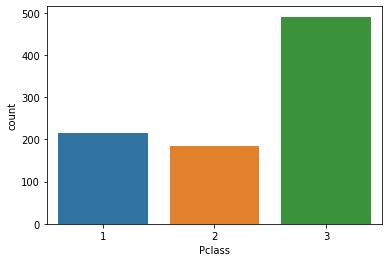

In [45]:
sns.countplot('Pclass',data=dataset)
dataset['Pclass'].value_counts()

In [46]:
#setting the values for dependent and independent variables
x= dataset.drop('Survived', 1)
y= dataset.Survived


#splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state =2 )


<ipython-input-46-b7dc89d74b2c>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x= dataset.drop('Survived', 1)
